# Understanding and Plotting Empirical CDFs in Python
## What is an Empirical CDF?
An Empirical Cumulative Distribution Function (ECDF) is a fundamental tool in statistics that shows the proportion of observations in a dataset that are less than or equal to a given value. Unlike histograms or kernel density estimates, ECDFs provide an exact representation of your data without requiring binning decisions or smoothing parameters.
## Why Use ECDFs?
ECDFs offer several advantages over other visualization methods:

- No arbitrary choices: Unlike histograms, you don't need to choose bin widths
- Show all data points: Every observation is represented
- Easy comparison: Multiple distributions can be overlaid cleanly
- Statistical properties: Direct visualization of percentiles and quantiles
- Distribution assessment: Quickly identify skewness, outliers, and compare to theoretical distributions

# Basic ECDF Plot with Matplotlib
Let's start with a simple example using NumPy and Matplotlib:

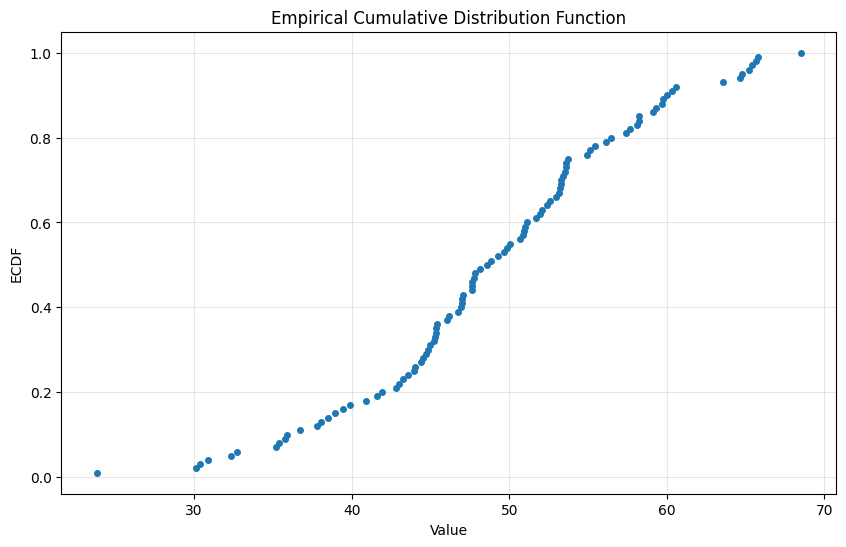

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100)

# Sort the data
sorted_data = np.sort(data)

# Calculate ECDF values
y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(sorted_data, y, marker='.', linestyle='none', markersize=8)
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.title('Empirical Cumulative Distribution Function')
plt.grid(True, alpha=0.3)
plt.show()

Using Seaborn for Cleaner ECDFs

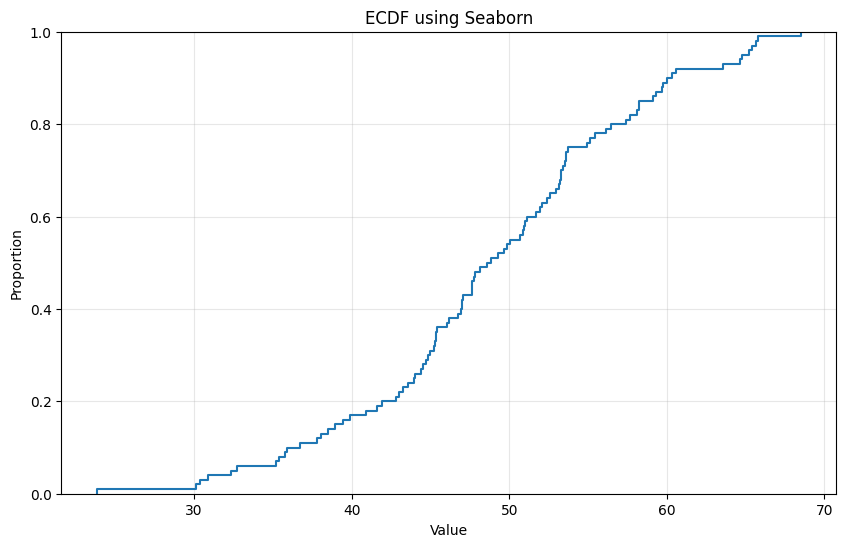

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100)

# Create ECDF plot
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=data)
plt.xlabel('Value')
plt.ylabel('Proportion')
plt.title('ECDF using Seaborn')
plt.grid(True, alpha=0.3)
plt.show()

Comparing Multiple Distributions


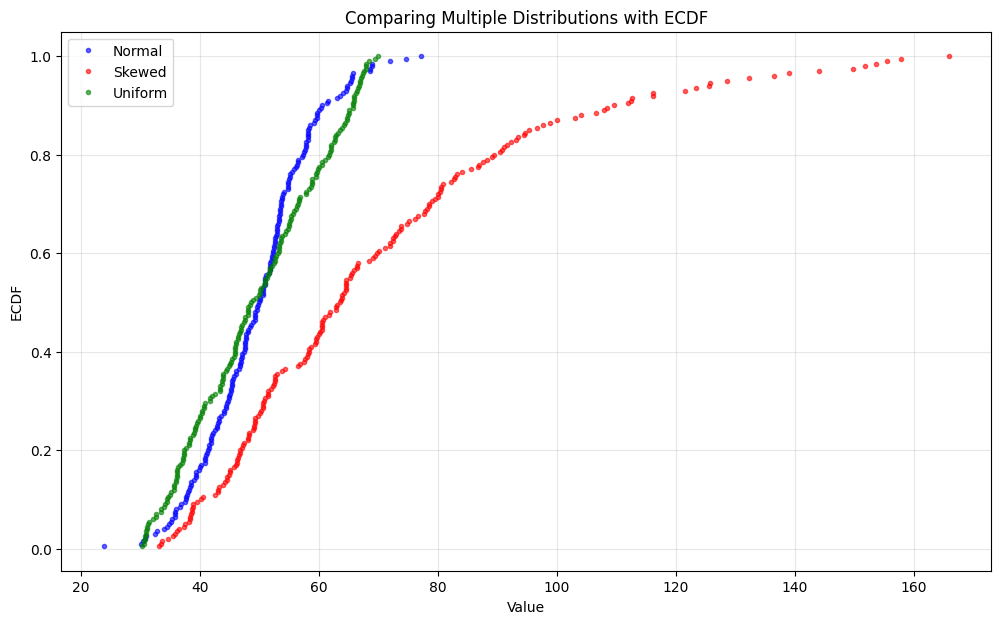

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate different distributions
np.random.seed(42)
normal_data = np.random.normal(loc=50, scale=10, size=200)
skewed_data = np.random.gamma(shape=2, scale=2, size=200) * 10 + 30
uniform_data = np.random.uniform(low=30, high=70, size=200)

def plot_ecdf(data, label, color):
    sorted_data = np.sort(data)
    y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, y, marker='.', linestyle='none',
             label=label, alpha=0.6, markersize=6, color=color)

plt.figure(figsize=(12, 7))
plot_ecdf(normal_data, 'Normal', 'blue')
plot_ecdf(skewed_data, 'Skewed', 'red')
plot_ecdf(uniform_data, 'Uniform', 'green')

plt.xlabel('Value')
plt.ylabel('ECDF')
plt.title('Comparing Multiple Distributions with ECDF')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# ECDF with Confidence Bands
Adding confidence bands helps assess uncertainty in your ECDF:

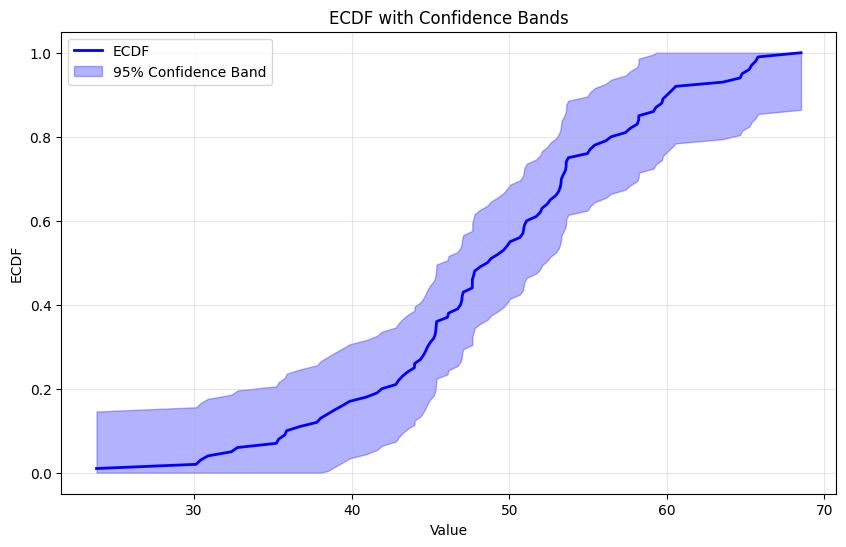

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def ecdf_with_confidence(data, alpha=0.05):
    n = len(data)
    sorted_data = np.sort(data)
    y = np.arange(1, n + 1) / n

    # Calculate confidence bands using Dvoretzky-Kiefer-Wolfowitz inequality
    epsilon = np.sqrt(np.log(2 / alpha) / (2 * n))
    lower = np.maximum(y - epsilon, 0)
    upper = np.minimum(y + epsilon, 1)

    return sorted_data, y, lower, upper

# Generate sample data
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100)

x, y, lower, upper = ecdf_with_confidence(data)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2, label='ECDF')
plt.fill_between(x, lower, upper, alpha=0.3, color='blue', label='95% Confidence Band')
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.title('ECDF with Confidence Bands')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Comparing to Theoretical Distributions
ECDFs are excellent for checking if your data follows a specific distribution:

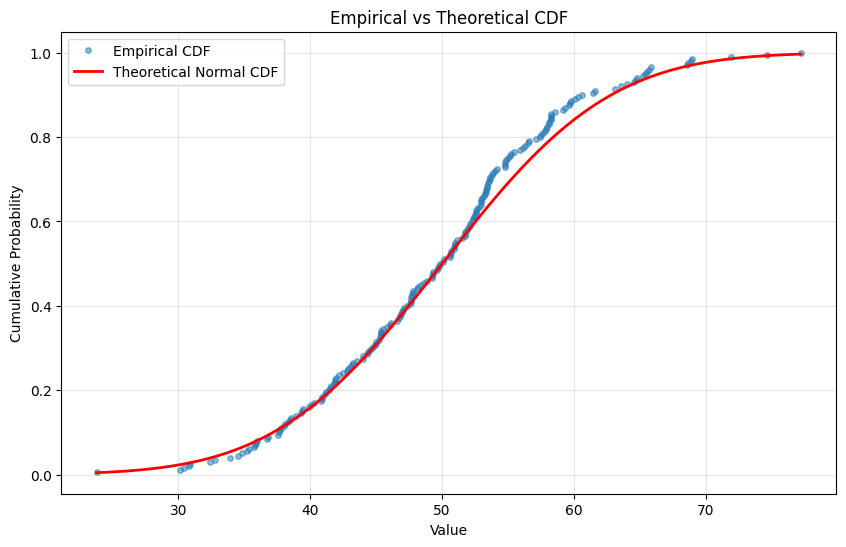

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate data
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=200)

# ECDF
sorted_data = np.sort(data)
ecdf_y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Theoretical normal CDF
x_theory = np.linspace(sorted_data.min(), sorted_data.max(), 1000)
theoretical_cdf = stats.norm.cdf(x_theory, loc=50, scale=10)

plt.figure(figsize=(10, 6))
plt.plot(sorted_data, ecdf_y, 'o', markersize=4, alpha=0.5, label='Empirical CDF')
plt.plot(x_theory, theoretical_cdf, 'r-', linewidth=2, label='Theoretical Normal CDF')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.title('Empirical vs Theoretical CDF')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Practical Applications
1. Percentile Analysis
ECDFs make it easy to read off percentiles directly from the plot. The median is where the ECDF crosses 0.5.
2. Outlier Detection
Steep rises in the ECDF indicate clusters of data, while flat regions indicate gaps or sparse areas.
3. Distribution Testing
Use Kolmogorov-Smirnov tests with ECDFs to formally test if data follows a theoretical distribution.
4. A/B Testing
Compare treatment and control groups by overlaying their ECDFs to see differences across the entire distribution, not just means.

# Conclusion
Empirical CDFs are a powerful, underutilized visualization tool that provides more information than histograms while avoiding arbitrary parameter choices. They're particularly valuable when comparing distributions, assessing fit to theoretical models, and understanding the complete shape of your data distribution.
The next time you reach for a histogram, consider whether an ECDF might better serve your analytical needs!